# Blog - CNN - Caltech101 | Airplanes, Motorbikes & Schooners

[Jupyter Notebook](https://github.com/rujeetjahagirdar/DM_Assignment1_Classification-/blob/ba65ac45fa2ad13bd83f11e7f35fae414f2c299b/playground4-basic-4layer-hyperparamsprntfrmt_AlLyrs_ExprmntCmnts2.ipynb)

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torchvision import datasets,transforms,io
from torch import utils
from collections import Counter

In [49]:
# from google.colab import drive
# drive.mount('/content/drive')

**Loading Images:**

First step of any Neural Network/Machine Learning problem is the loading the input data. Here in this cell we will load the given input images. The problem set gives us different types of images of Bikes, Airplanes, Schooners. And we have to create a neural network model that will classify a given image in to these three categories. 
Here given images are in different shapes so while loading these images we will transform them into 512x512 pixels size and then convert them into Tensors.
Tensor is a numpy array like data structure which is developed for handling arrays of large size for example image arrays.

Next, we will split our input dataset into three sub datasets i.e. training dataset, validation dataset and testing dataset. Here we have kept around 20% of total data aside for testing and remaining 80% data we will use for traning and validation.

We will convert these three datasets into respective dataloader object. Dataloader object will be used for iterating over the these data and divide them in batches.


In [50]:
# for i,data in enumerate(trainDataLoader):
#     print(len(data[0]))

400

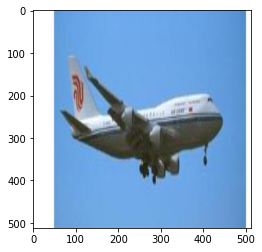

In [33]:
transform = transforms.Compose([transforms.Resize((512,512)),transforms.ToTensor()])
dataset = datasets.ImageFolder('../input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/',transform=transform)
trainData,validationData,testData = utils.data.random_split(dataset,[930,400,331],generator=torch.Generator().manual_seed(42))
plt.imshow(trainData[230][0].permute(1,2,0))
trainDataLoader = torch.utils.data.DataLoader(trainData, batch_size=32, shuffle=True)
validationDataLoder = torch.utils.data.DataLoader(validationData, batch_size=32, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testData, batch_size=32, shuffle=True)
len(validationDataLoder.dataset)

In [52]:
# validationDataLoder

**Creating CNN Architectures:**

In this code block we have defined the architecture of our Convolutional Networks. We have created 3 convolutional layers and 2 fully connected layers.
Each convolutional layer will have a pooling layer attached after it. This block of code is the essence of our CNN. Brief information about these layers is as mentioned below.</br>
**Conv Layer:**  In this layer number of kernels of size specified by user will be used to convolve on the given input image matrix. Kernel is basically a small matrix which will be used to learn some specific feature in the image. For example, one kernel can be used to determine the vertical line in the image, another kernal can used to determine a curve in the image.</br>So during training phase of the model, these kernal are learned and used later in testing phase to determine that feature in the test image.</br>
Here the first layer, we have used a 16 kernels of size 3, stride=1 and padding=1. which will have the original image as an input and will output activation maps of dimensions 512x512x16.
</br>**ReLU:**
ReLU is the activation function. It will apply an elementwise activation function, such as the max(0,x) thresholding at zero. This leaves the size of the volume unchanged ([512x512x16]).[1]
</br>**Pooling Layer:** As the size of the channels increases the weights associated with them also increases which leads to performance degredation. So, to solve this problem pooling layer is used. Pooling layer is used to reduce the size of input image. It will use a pooling technique to reduce the size image. Max pooling is the type of pooling which will convolve an nxn kernel on the image and will select the maximum element from the window.
It will output an image of dimensions
<br>W2=(W1−F)/S+1
<br>H2=(H1−F)/S+1
<br>D2=D1<br>
where W2, H2 are the dimensions of the output image and W1,H1 are the dimensions of input image and F is size of the pooling kernel and S is the stride.
</br><br>
In CNN multiple conv layer and pool layers will be chained together, so output of the previous layer will be the input of next layer.
<br><br>
***Fully connected Layer:***<br>
The fully-connected layer is called the “output layer” and in classification settings it represents the class scores.[1]<br>
The last fully connected layer will have output channesl numers equal to the number of classes in problem. For this classification problem we have three classes (Motorbike, Ariplane, Schooner) so our fully connected layer will have 3 as output channel and will output the volumn of [1x1x3].<br> 

***Creating Different CNN Models***<br>
Here we will create 3 different CNN model architecures and move these models to GPU if GPU is available.<br>
We will test the peroformance of these CNN models and compare them.

In [34]:
class CNN2(torch.nn.Module):
#     __name__="Model2"
    def __init__(self):
        super(CNN2, self).__init__()
        ###############################
        # Original Input image: (224,224,3)
        # Conv : (224,224,16)
        # Pool: (112,112,16)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ########################################
        # Input Image: (112,112,16)
        # Conv: (112,112,64)
        # Pool: (56,56,64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ############################################
        # FC 28*28*128 -> 625
        self.fc1 = torch.nn.Linear(128*128 * 64, 3, bias=True) # size of image input to this layer * 128
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU()
        )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        return out


#instantiate CNN model
model2 = CNN2()
model2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model2.to(device)

CNN2(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1048576, out_features=3, bias=True)
  (layer4): Sequential(
    (0): Linear(in_features=1048576, out_features=3, bias=True)
    (1): ReLU()
  )
)

In [35]:
class CNN3(torch.nn.Module):
    __name__="Model3"
    def __init__(self):
        super(CNN3, self).__init__()
        ###############################
        # Original Input image: (512,512,3)
        # Conv : (512,512,16)
        # Pool: (256,256,16)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ########################################
        # Input Image: (256,256,16)
        # Conv: (256,256,64)
        # Pool: (128,128,64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ###############################
        # Input image: (128,128,64)
        # Conv : (128,128,128)
        # Pool: (64,64,128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ############################################
        # FC 28*28*128 -> 625
        self.fc1 = torch.nn.Linear(64*64 * 128, 256, bias=True) # size of image input to this layer * 128
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU()
        )
        ############################################
        # FC 256 -> 3 Classes
        self.fc2 = torch.nn.Linear(256, 3, bias=True) # size of image input to this layer * 128
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.layer5 = torch.nn.Sequential(
            self.fc2,
            torch.nn.ReLU()
        )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        out = self.fc2(out)
        return out


#instantiate CNN model
model3 = CNN3()
model3
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model3.to(device)

CNN3(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=524288, out_features=256, bias=True)
  (layer4): Sequential(
    (0): Linear(in_features=524288, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc2): Linear(in_features=256, out_features=3, bias=True)
  (layer5): Sequential(
    (0): Linear(in_features=256, out_features=3, bias=True)
    (1): ReLU()
  )
)

In [36]:
class CNN4(torch.nn.Module):
    __name__="Model4"
    def __init__(self):
        super(CNN4, self).__init__()
        ###############################
        # Original Input image: (512,512,3)
        # Conv : (512,512,16)
        # Pool: (256,256,16)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ########################################
        # Input Image: (256,256,16)
        # Conv: (256,256,64)
        # Pool: (128,128,64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ###############################
        # Input image: (128,128,64)
        # Conv : (128,128,128)
        # Pool: (64,64,128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ###############################
        # Input image: (64,64,128)
        # Conv : (64,64,512)
        # Pool: (32,32,512)
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ############################################
        # FC 28*28*128 -> 625
        self.fc1 = torch.nn.Linear(32*32 * 512, 256, bias=True) # size of image input to this layer * 128
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer5 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU()
        )
        ############################################
        # FC 28*28*128 -> 625
        self.fc2 = torch.nn.Linear(256,512, bias=True) # size of image input to this layer * 128
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.layer6 = torch.nn.Sequential(
            self.fc2,
            torch.nn.ReLU()
        )
        ############################################
        # FC 256 -> 3 Classes
        self.fc3 = torch.nn.Linear(512, 3, bias=True) # size of image input to this layer * 128
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        self.layer7 = torch.nn.Sequential(
            self.fc3,
            torch.nn.ReLU()
        )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out


#instantiate CNN model
model4 = CNN4()
model4
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model4.to(device)

CNN4(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=524288, out_features=256, bias=True)
  (layer5): Sequential(
    (0): Linear(in_features=524288, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc2

**Training CNN model:**
<br>This block will be used to train the CNN model with the training dataset.<br>
"train_cnn_function()" function will take number of epochs, learning rate and models to use as input and use them to train the CNN model.


In [37]:
def train_cnn_function(no_epochos,lr,model):
    import torch.optim as optim

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    no_of_epochos = no_epochos
    for epoch in range(no_of_epochos):
        running_loss = 0.0
        for i,data in enumerate(trainDataLoader):
#           if(i%10==0):
#             print("i=",i)
          inputData , lable = data[0].to(device), data[1].to(device)
          optimizer.zero_grad()
          output = model(inputData)
          loss = criterion(output,lable)
          loss.backward()
          optimizer.step()
          running_loss = running_loss+loss.item()
          if i % 5 == 4:    # print every 100 mini-batches
            print('Epoch={} Batch={} Loss= {}'.format(epoch + 1, i + 1, running_loss / 5))
            running_loss = 0.0
    print("####Finished Training######")

**Testing model:**<br>
In this block we will test our model on validation and test dataset.
<br>
"test_validation_function()" and "test_test_function()" will take model as input.<br>
First we will move our input data to GPU and then use our CNN model to predict the class of the images. For each image we will calculate loss and correct predictions.
<br>
These same steps will be used for test dataset as well.
<br>

In [38]:
def test_validation_function(model):
    valcorrect = 0
    valtotal = 0
    with torch.no_grad():
        for data in validationDataLoder:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            valtotal = valtotal + labels.size(0)
            valcorrect = valcorrect + (predicted == labels).sum().item()

    print('Accuracy of the network on validation images: %d %%' % (
        100 * valcorrect / valtotal))
    return(valcorrect / valtotal)
def test_test_function(model):
    testcorrect = 0
    testtotal = 0
    with torch.no_grad():
        for data in testDataLoader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            testtotal = testtotal + labels.size(0)
            testcorrect = testcorrect + (predicted == labels).sum().item()

    print('Accuracy of the network on test images: %d %%' % (
        100 * testcorrect / testtotal))
    return(testcorrect / testtotal)

***Experimentation/Contributions:***<br>
In this block of code we will manually grid search different parameters combinations.<br>
Here we will test three different models with 2 layers, 3 layers and 4 layers. For each model we have trained our cnn model with different combinations of number of epoches and learning rate. For theese different combinations, we will save their prediction accuracy on validation set and their running time. We will choose the best parameters based on validation dataset accuracy and running time for training and use those parameters for test dataset.


In [39]:
import itertools
from datetime import datetime
# test_accuracy=[]
no_epo_list =[1,3,5,7]
lr_list=[0.001,0.01]
overallData=[]
testAccuracy={}
combined = list(itertools.product(no_epo_list,lr_list))
models={'2':model2,'3':model3,'4':model4}
for model in models:
    validation_accuracy=[]
    runningTime=[]
    print("$$$$$$$$$$$$$$$$$$$$$$$$ For model with {} layers $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\n".format(model))
    for i in range(len(combined)):
        print("Started training for parametrs: {}".format(combined[i]))
        start = datetime.now()
        train_cnn_function(combined[i][0],combined[i][1],models[model])
        end = datetime.now()
        print(end-start)
        totalTime=round((end - start).seconds+((end-start).microseconds /1000000),4)
        runningTime.append(totalTime)
        result = test_validation_function(models[model])
        validation_accuracy.append(result)
    #     test_accuracy.append(result[1])
        print("Params: {},validation_accu:{}, time={} secs".format(combined[i],result,totalTime))
        print("______________________________________________________")
    # print(combined)
    # print(validation_accuracy)
    # print(test_accuracy)
              ####Table print#####
    from tabulate import tabulate
    data=[]
    for i in range(len(combined)):
        data.append([str(model)+" layers",combined[i],validation_accuracy[i],runningTime[i]])
    print("\n")
    overallData.extend(data)
    print(tabulate(data,headers=['Model Layers','Parameters(Epochs,LR)','Validation Accu','Running Time(seconds)']))
    bestIndex=-1
    minTime=float("inf")
    maxAccu=max(validation_accuracy)
    for i,v in enumerate(validation_accuracy):
        if(v==maxAccu):
            if(runningTime[i]<minTime):
                minTime=runningTime[i]
                bestIndex=i
    print("\nBest Parameters: {}, Validation Acuuracy: {}, Running Time: {}".format(combined[bestIndex],validation_accuracy[bestIndex],runningTime[bestIndex]))
    print("\nBased on these parameters, the test accuracy is:\n")
    train_cnn_function(combined[bestIndex][0],combined[bestIndex][1],models[model])
    testResult=test_test_function(models[model])
    print(testResult)
    testAccuracy[model]=testResult
    for i in range(len(overallData)):
        if(int(overallData[i][0][0])==int(model)):
            if(overallData[i][1]==combined[bestIndex]):
                overallData[i].insert(1,round(testAccuracy[model]*100,3))
            else:
                overallData[i].insert(1," ")
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\n")

print("Overall Performance\n")
print(tabulate(overallData,headers=['Model Layers','Test Accu for Best Parameters','Parameters(Epochs,LR)','Validation Accu','Running Time(seconds)']))

$$$$$$$$$$$$$$$$$$$$$$$$ For model with 2 layers $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

Started training for parametrs: (1, 0.001)
Epoch=1 Batch=5 Loss= 3.3674951553344727
Epoch=1 Batch=10 Loss= 1.5113786697387694
Epoch=1 Batch=15 Loss= 0.7572620272636413
Epoch=1 Batch=20 Loss= 0.5173098564147949
Epoch=1 Batch=25 Loss= 0.6130441188812256
Epoch=1 Batch=30 Loss= 0.3770324409008026
####Finished Training######
0:00:14.769318
Accuracy of the network on validation images: 89 %
Params: (1, 0.001),validation_accu:0.8975, time=14.7693 secs
______________________________________________________
Started training for parametrs: (1, 0.01)
Epoch=1 Batch=5 Loss= 0.5197314441204071
Epoch=1 Batch=10 Loss= 0.49592100381851195
Epoch=1 Batch=15 Loss= 0.9829528063535691
Epoch=1 Batch=20 Loss= 15.984781575202941
Epoch=1 Batch=25 Loss= 0.8886783480644226
Epoch=1 Batch=30 Loss= 0.9020085096359253
####Finished Training######
0:00:14.855420
Accuracy of the network on validation images:

***Conclusion:***<br>
Based on our experiments with 3 different models we observe that with 4 layers model we got accuracy of 96% on test dataset with best parameters combination of number of epochos=7 and learning rate =0.001

**References:**<br>


1.   [CS231n: Deep Learning for Computer Vision - Stanford - Spring 2022](https://cs231n.github.io/convolutional-networks/)
2.   [PyTorch Tutorials](https://pytorch.org/tutorials/index.html)

3.   [PyTorch Conv2D Explained with Examples](https://machinelearningknowledge.ai/pytorch-conv2d-explained-with-examples/)




In [ ]:
# print('Actual:{} Predicted:{}'.format(testData.dataset.classes[labels[7]],testData.dataset.classes[predicted[7]]))
# plt.imshow(images[7].cpu().permute(1,2,0))

In [ ]:
# for i in testDataLoader:
#   print('Images:{} --> Lables:{}'.format(len(i[0]),len(i[1])))